In [3]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
#import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import mean_squared_error
from google.colab import drive
drive.mount('/drive')
warnings.filterwarnings("ignore")

#we use the rays home data since they play in a dome so the weather conditions are consistent.
df = pd.read_csv('/drive/My Drive/Colab Notebooks/positioning_project/gb_and_fb_models/rays_home_season.csv')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [4]:
# split into X and y
# x are launch_speed, launch_angle, spray_angle, and bat_side
y_columns = ['t', 'x', 'y']
X, y = df.drop(y_columns, axis=1), df[y_columns]
bat_hand = pd.get_dummies(X['bat_side'], drop_first = False)
X['bat_handR'] = bat_hand['R']
X.drop(columns='bat_side', inplace = True)

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

n = 1000
model_t = XGBRegressor(objective="reg:squarederror", tree_method= "hist", num_boost_round=n).fit(X_train.values, y_train.t.values)

preds_t = model_t.predict(X_test.values)
rmse_t = mean_squared_error(y_test.t.values, preds_t, squared=False)

print(f"RMSE of the base model: {rmse_t:.3f}")

RMSE of the base model: 0.067


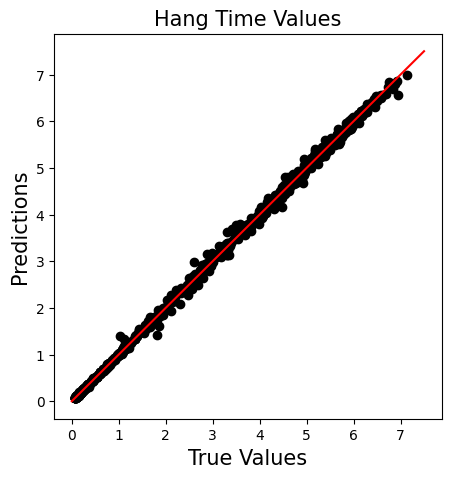

In [5]:
# hang time actual vs predicted graph
plt.figure(figsize=(5,5))
plt.scatter(y_test.t.values, preds_t, c='black')
plt.plot([0, 7.5], [0, 7.5], color='red')

plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.title('Hang Time Values', fontsize=15)
plt.show()

In [6]:
# testing x-coord as y

model_x = XGBRegressor(objective="reg:squarederror", tree_method= "hist", num_boost_round=n).fit(X_train.values, y_train.x.values)


preds_x = model_x.predict(X_test.values)
rmse_x = mean_squared_error(y_test.x.values, preds_x, squared=False)

print(f"RMSE of the base model: {rmse_x:.3f}")

RMSE of the base model: 6.488


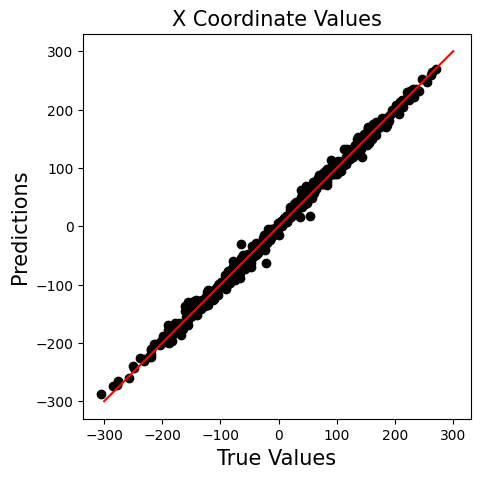

In [7]:
# x_coord actual vs predicted graph
plt.figure(figsize=(5,5))
plt.scatter(y_test.x.values, preds_x, c='black')
plt.plot([-300, 300], [-300, 300], color='red')

plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.title('X Coordinate Values', fontsize=15)
plt.show()

In [8]:
# testing y-coord as y

model_y = XGBRegressor(objective="reg:squarederror", tree_method= "hist", num_boost_round=n).fit(X_train.values, y_train.y.values)


preds_y = model_y.predict(X_test.values)
rmse_y = mean_squared_error(y_test.y.values, preds_y, squared=False)

print(f"RMSE of the base model: {rmse_y:.3f}")

RMSE of the base model: 6.612


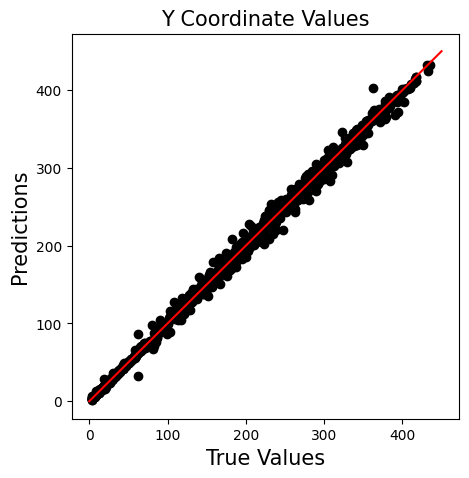

In [9]:
# y-coord actual vs predicted graph
plt.figure(figsize=(5,5))
plt.scatter(y_test.y.values, preds_y, c='black')
plt.plot([0, 450], [0, 450], color='red')

plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.title('Y Coordinate Values', fontsize=15)
plt.show()

In [10]:
# testing distance as y
y_train['distance'] = np.sqrt(y_train.y.values**2 + y_train.x.values**2)
y_test['distance'] = np.sqrt(y_test.x.values**2 + y_test.y.values**2)

model_dist = XGBRegressor(objective="reg:squarederror", tree_method= "hist", num_boost_round=n).fit(X_train.values, y_train.distance.values)


preds_d = model_dist.predict(X_test.values)
rmse_d = mean_squared_error(y_test.distance.values, preds_d, squared=False)

print(f"RMSE of the base model: {rmse_d:.3f}")

RMSE of the base model: 5.062


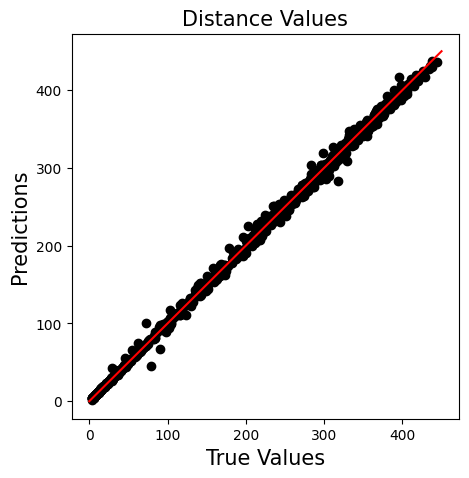

In [11]:
# y-coord actual vs predicted graph
plt.figure(figsize=(5,5))
plt.scatter(y_test.distance.values, preds_d, c='black')
plt.plot([0, 450], [0, 450], color='red')

plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.title('Distance Values', fontsize=15)
plt.show()

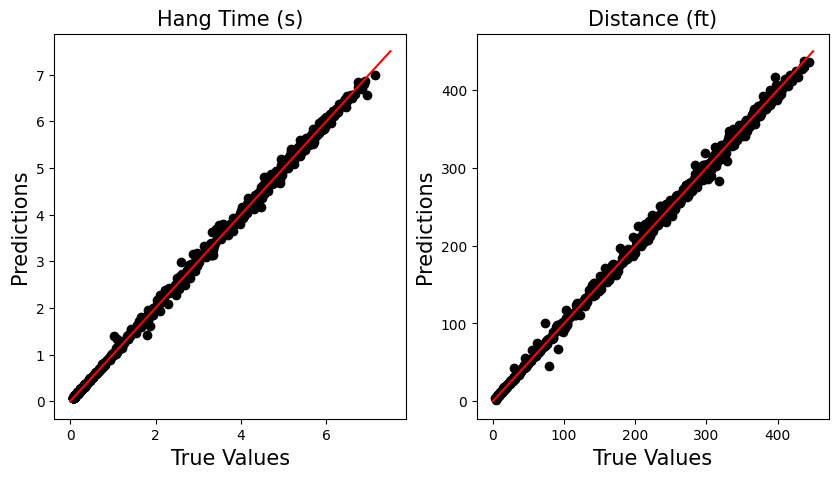

In [15]:
plt.figure(figsize=(10,5))
ax1 = plt.subplot(121)
ax1.scatter(y_test.t.values, preds_t, c='black')
ax1.plot([0, 7.5], [0, 7.5], color='red')
ax1.set_xlabel('True Values', fontsize=15)
ax1.set_ylabel('Predictions', fontsize=15)
ax1.set_title('Hang Time (s)', fontsize=15)

ax2 = plt.subplot(122)
ax2.scatter(y_test.distance.values, preds_d, c='black')
ax2.plot([0, 450], [0, 450], color='red')
ax2.set_xlabel('True Values', fontsize=15)
ax2.set_ylabel('Predictions', fontsize=15)
ax2.set_title('Distance (ft)', fontsize=15)
plt.show()

In [ ]:
#looks great, save the models

#show the columns, so I know the features
X_train.columns

Index(['launch_angle', 'launch_speed', 'spray_angle', 'bat_handR'], dtype='object')

In [ ]:
import pickle
with open('/drive/My Drive/Colab Notebooks/positioning_project/gb_and_fb_models/hangtime_model.pkl', 'wb') as f:
  pickle.dump(model_t, f)

with open('/drive/My Drive/Colab Notebooks/positioning_project/gb_and_fb_models/landingx_model.pkl', 'wb') as f:
  pickle.dump(model_x, f)

with open('/drive/My Drive/Colab Notebooks/positioning_project/gb_and_fb_models/landingy_model.pkl', 'wb') as f:
  pickle.dump(model_y, f)

with open('/drive/My Drive/Colab Notebooks/positioning_project/gb_and_fb_models/landing_dist_model.pkl', 'wb') as f:
  pickle.dump(model_dist, f)